In [25]:
import pandas
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns
import glob, os
import numpy as np

plt.rc("font", family="Malgun Gothic")

In [26]:
files = glob.glob(os.path.join('./data/','*이슈키워드*'))

columnNames = ['기준일자', '키워드명', '급상승점수값', '키워드문서수', '채널명']

data = []

for i in range(len(files)):
             
    series = pd.read_csv(files[i], names=columnNames, encoding='cp949', skiprows=[0])

    data.append(series)
    
    
data = pd.concat(data, axis=0, ignore_index=True)

data.to_csv("keyword_all_list.csv", mode='w', encoding='cp949', index = False)

In [27]:
df = pd.read_csv("./keyword_all_list.csv", encoding='cp949')

df

,기준일자,키워드명,급상승점수값,키워드문서수,채널명
0,20170101,저당,310.69,1870,ko.twitter
1,20170101,로또,288.67,29804,ko.twitter
2,20170101,이자율,281.71,737,ko.twitter
3,20170101,가트,271.85,3341,ko.twitter
4,20170101,실업률,254.34,592,ko.twitter
...,...,...,...,...,...
27275,20200930,태업,296.40,394,ko.twitter
27276,20200930,대출,278.97,5846,ko.twitter
27277,20200930,스타지수,273.98,312,ko.twitter
27278,20200930,저금리,269.61,379,ko.twitter


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27280 entries, 0 to 27279
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준일자    27280 non-null  int64  
 1   키워드명    27280 non-null  object 
 2   급상승점수값  27280 non-null  float64
 3   키워드문서수  27280 non-null  int64  
 4   채널명     27280 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.0+ MB


In [29]:
df.isnull().sum()

기준일자      0
키워드명      0
급상승점수값    0
키워드문서수    0
채널명       0
dtype: int64

In [30]:
df['채널명'].unique()

array(['ko.twitter'], dtype=object)

In [31]:
df = df.drop(['채널명'], axis=1)

In [32]:
df['기준일자'] = pd.to_datetime(df['기준일자'], format='%Y%m%d')


df['기준_년'] = df['기준일자'].dt.year 
df['기준_월'] = df['기준일자'].dt.month
df['기준_일'] = df['기준일자'].dt.day

In [33]:
df

,기준일자,키워드명,급상승점수값,키워드문서수,기준_년,기준_월,기준_일
0,2017-01-01,저당,310.69,1870,2017,1,1
1,2017-01-01,로또,288.67,29804,2017,1,1
2,2017-01-01,이자율,281.71,737,2017,1,1
3,2017-01-01,가트,271.85,3341,2017,1,1
4,2017-01-01,실업률,254.34,592,2017,1,1
...,...,...,...,...,...,...,...
27275,2020-09-30,태업,296.40,394,2020,9,30
27276,2020-09-30,대출,278.97,5846,2020,9,30
27277,2020-09-30,스타지수,273.98,312,2020,9,30
27278,2020-09-30,저금리,269.61,379,2020,9,30


In [34]:
df = df[['기준일자', '기준_년', '기준_월', '기준_일', '키워드명', '급상승점수값', '키워드문서수']]

df

,기준일자,기준_년,기준_월,기준_일,키워드명,급상승점수값,키워드문서수
0,2017-01-01,2017,1,1,저당,310.69,1870
1,2017-01-01,2017,1,1,로또,288.67,29804
2,2017-01-01,2017,1,1,이자율,281.71,737
3,2017-01-01,2017,1,1,가트,271.85,3341
4,2017-01-01,2017,1,1,실업률,254.34,592
...,...,...,...,...,...,...,...
27275,2020-09-30,2020,9,30,태업,296.40,394
27276,2020-09-30,2020,9,30,대출,278.97,5846
27277,2020-09-30,2020,9,30,스타지수,273.98,312
27278,2020-09-30,2020,9,30,저금리,269.61,379


In [35]:
keyword_2017 = df[df['기준_년'] == 2017]
keyword_2018 = df[df['기준_년'] == 2018]
keyword_2019 = df[df['기준_년'] == 2019]
keyword_2020 = df[df['기준_년'] == 2020]

keyword_2017.info()
keyword_2018.info()
keyword_2019.info()
keyword_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7300 entries, 0 to 7299
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일자    7300 non-null   datetime64[ns]
 1   기준_년    7300 non-null   int64         
 2   기준_월    7300 non-null   int64         
 3   기준_일    7300 non-null   int64         
 4   키워드명    7300 non-null   object        
 5   급상승점수값  7300 non-null   float64       
 6   키워드문서수  7300 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 456.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7300 entries, 7300 to 14599
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일자    7300 non-null   datetime64[ns]
 1   기준_년    7300 non-null   int64         
 2   기준_월    7300 non-null   int64         
 3   기준_일    7300 non-null   int64         
 4   키워드명    7300 non-null   object      

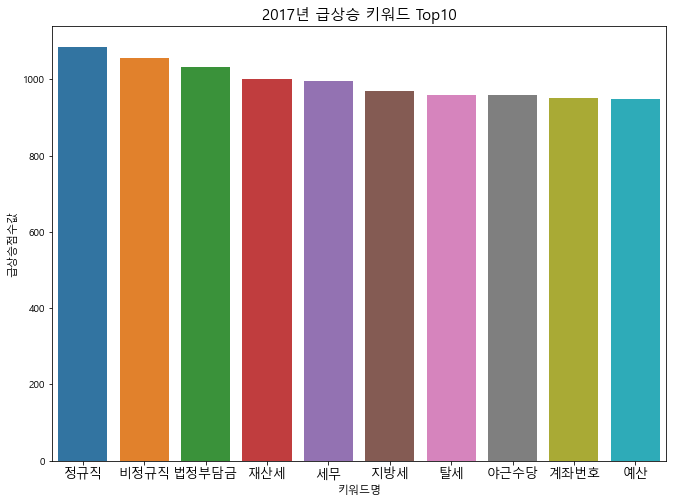

In [36]:
keyword_2017_topscore = keyword_2017.sort_values(by='급상승점수값', ascending=False)

keyword_2017_topscore = keyword_2017_topscore[['키워드명', '급상승점수값']].head(10)


ax = plt.subplots(figsize=(11,8))
plt.xticks(fontsize=13)
ax = sns.barplot(x='키워드명', y='급상승점수값', data=keyword_2017_topscore)
ax.set_xlabel("키워드명", fontsize=11)
ax.set_ylabel("급상승점수값", fontsize=11)
ax.set_title("2017년 급상승 키워드 Top10", fontsize=15)
plt.show()

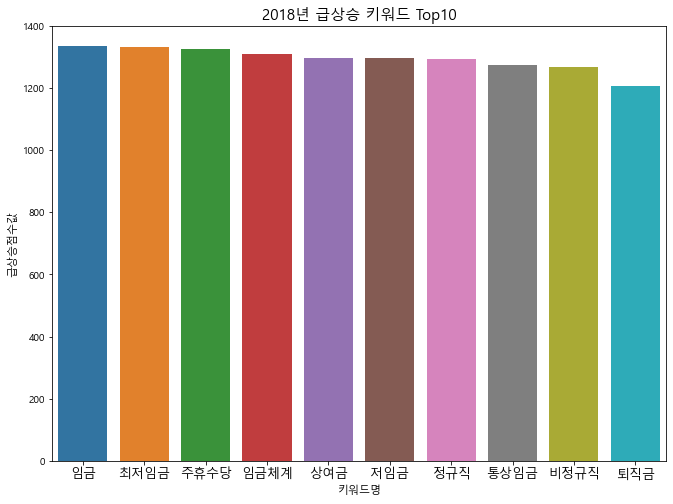

In [37]:
keyword_2018_topscore = keyword_2018.sort_values(by='급상승점수값', ascending=False)

keyword_2018_topscore = keyword_2018_topscore[['키워드명', '급상승점수값']].head(10)

ax = plt.subplots(figsize=(11,8))
plt.xticks(fontsize=15) 
plt.xticks(fontsize=13)
ax = sns.barplot(x='키워드명', y='급상승점수값', data=keyword_2018_topscore)
ax.set_xlabel("키워드명", fontsize=11)
ax.set_ylabel("급상승점수값", fontsize=11)
ax.set_title("2018년 급상승 키워드 Top10", fontsize=15)
plt.show()

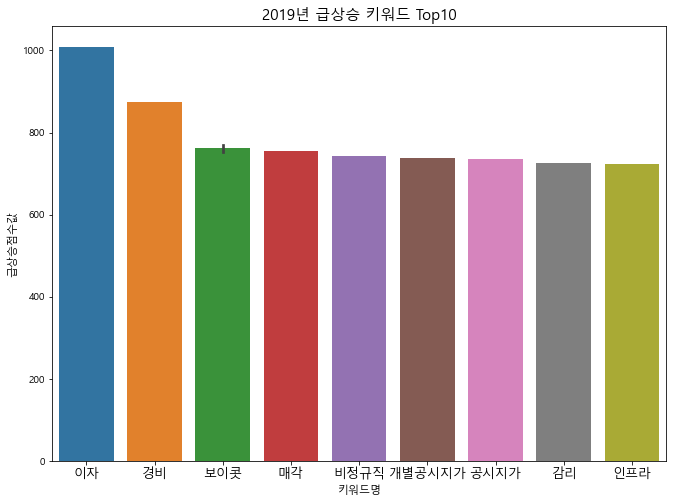

In [38]:
keyword_2019_topscore = keyword_2019.sort_values(by='급상승점수값', ascending=False)

keyword_2019_topscore = keyword_2019_topscore[['키워드명', '급상승점수값']].head(10)

ax = plt.subplots(figsize=(11,8))
plt.xticks(fontsize=13)
ax = sns.barplot(x='키워드명', y='급상승점수값', data=keyword_2019_topscore)
ax.set_xlabel("키워드명", fontsize=11)
ax.set_ylabel("급상승점수값", fontsize=11)
ax.set_title("2019년 급상승 키워드 Top10", fontsize=15)
plt.show()

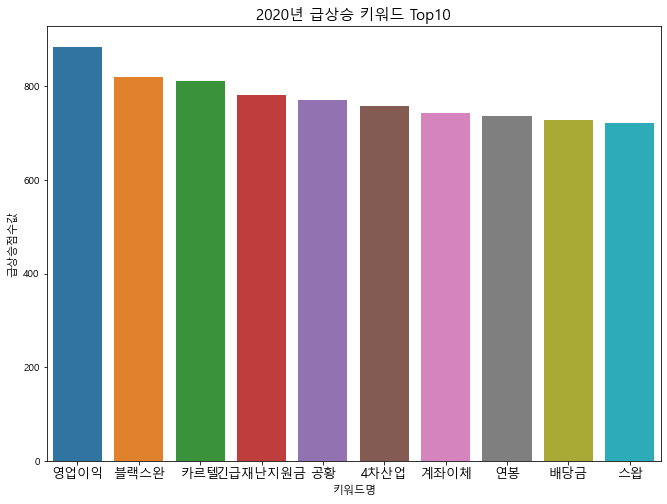

In [39]:
keyword_2020_topscore = keyword_2020.sort_values(by='급상승점수값', ascending=False)

keyword_2020_topscore = keyword_2020_topscore[['키워드명', '급상승점수값']].head(10)

ax = plt.subplots(figsize=(11,8))
plt.xticks(fontsize=13)
ax = sns.barplot(x='키워드명', y='급상승점수값', data=keyword_2020_topscore)
ax.set_xlabel("키워드명", fontsize=11)
ax.set_ylabel("급상승점수값", fontsize=11)
ax.set_title("2020년 급상승 키워드 Top10", fontsize=15)
plt.show()

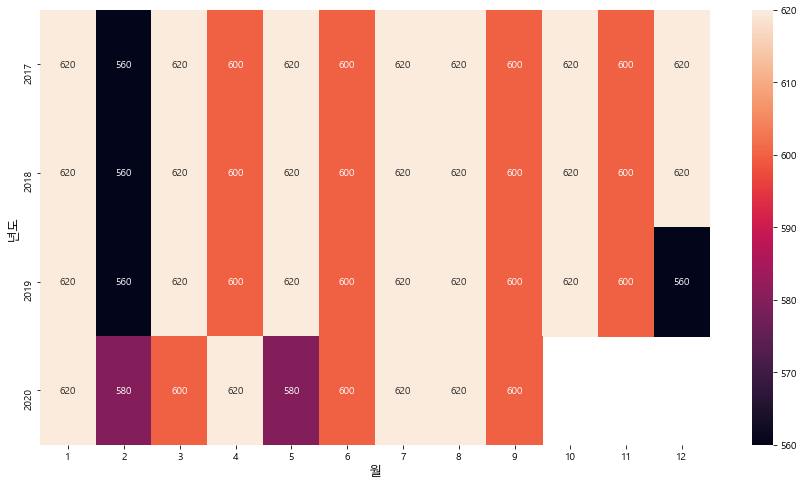

In [40]:
heat_data = df.pivot_table(index='기준_년', columns='기준_월', values='키워드명', aggfunc='size')

ax = plt.subplots(figsize=(15,8))
ax = sns.heatmap(heat_data, annot=True, fmt='.0f')
#ax.set_title("연간 키워드 검색 분포",pad=20,fontsize=15)

plt.xlabel('월', fontsize=13)
plt.ylabel('년도', fontsize=13)
plt.show()

In [41]:
all_word_bindo = df['키워드명'].value_counts()
all_word_bindo_top10 = all_word_bindo.sort_values(ascending=False).head(10)

keyword_2017_bindo = keyword_2017['키워드명'].value_counts()
keyword_2017_bindo_top10 = keyword_2017_bindo.sort_values(ascending=False).head(10)

keyword_2018_bindo = keyword_2018['키워드명'].value_counts()
keyword_2018_bindo_top10 = keyword_2018_bindo.sort_values(ascending=False).head(10)

keyword_2019_bindo = keyword_2019['키워드명'].value_counts()
keyword_2019_bindo_top10 = keyword_2019_bindo.sort_values(ascending=False).head(10)

keyword_2020_bindo = keyword_2020['키워드명'].value_counts()
keyword_2020_bindo_top10 = keyword_2020_bindo.sort_values(ascending=False).head(10)

print(all_word_bindo_top10)
print('------------------------')
print(keyword_2017_bindo_top10)
print('------------------------')
print(keyword_2018_bindo_top10)
print('------------------------')
print(keyword_2019_bindo_top10)
print('------------------------')
print(keyword_2020_bindo_top10)

보이콧     161
연봉      138
매출      131
최저임금    129
마케팅     129
후원금     128
장학금     127
협업      124
해고      124
기부금     119
Name: 키워드명, dtype: int64
------------------------
보이콧     54
후원금     43
최저임금    39
장학금     38
연봉      37
마케팅     37
물가      35
해고      35
로또      34
적자      34
Name: 키워드명, dtype: int64
------------------------
최저임금    48
보이콧     47
연봉      42
마케팅     41
양육비     38
카르텔     36
후원금     35
매출      35
소득      34
이율      34
Name: 키워드명, dtype: int64
------------------------
보이콧     43
기부금     39
장학금     39
협업      38
아세안     37
크러쉬     36
상장      35
매출      35
정규직     34
재능기부    33
Name: 키워드명, dtype: int64
------------------------
협업      31
양육비     31
매출      30
손해배상    30
블랙스완    29
기부금     29
연봉      28
증세      28
재택근무    27
저소득     27
Name: 키워드명, dtype: int64


C:\Users\pcn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


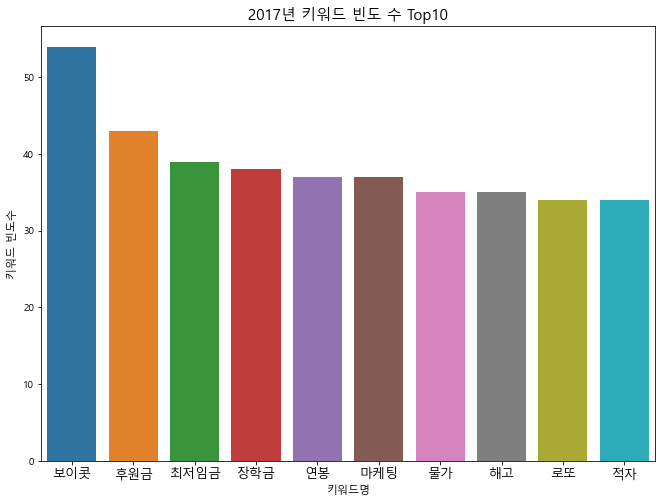

In [42]:
ax = plt.subplots(figsize=(11,8))
plt.xticks(fontsize=13)

ax = sns.barplot(keyword_2017_bindo_top10.index, keyword_2017_bindo_top10.values)
ax.set_xlabel("키워드명", fontsize=11)
ax.set_ylabel("키워드 빈도수", fontsize=11)

ax.set_title("2017년 키워드 빈도 수 Top10", fontsize=15)
plt.show()

C:\Users\pcn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


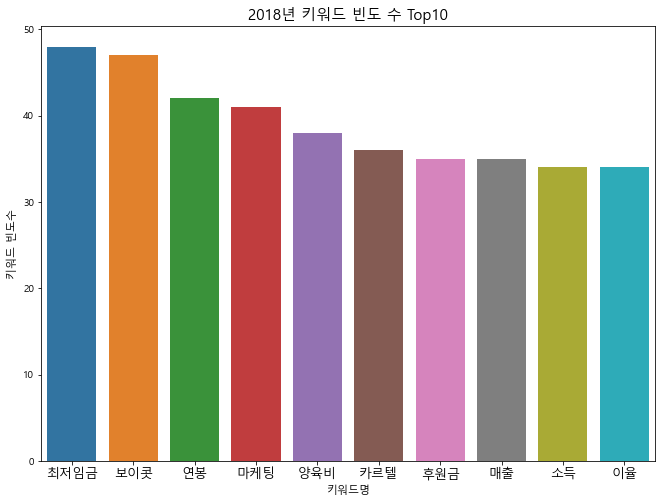

In [43]:
ax = plt.subplots(figsize=(11,8))
plt.xticks(fontsize=13)

ax = sns.barplot(keyword_2018_bindo_top10.index, keyword_2018_bindo_top10.values)
ax.set_xlabel("키워드명", fontsize=11)
ax.set_ylabel("키워드 빈도수", fontsize=11)

ax.set_title("2018년 키워드 빈도 수 Top10", fontsize=15)
plt.show()

C:\Users\pcn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


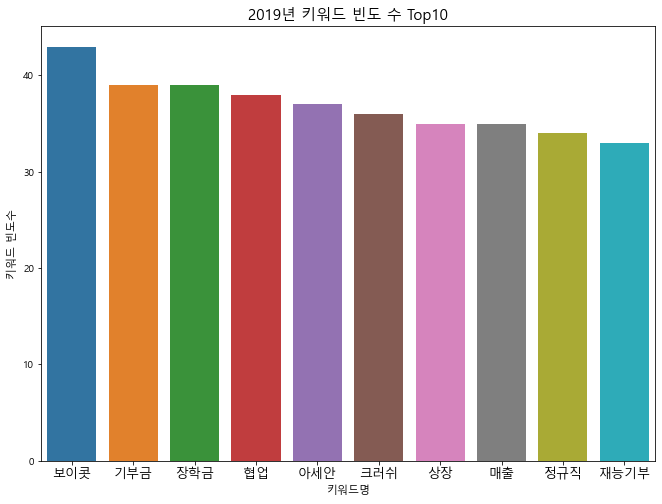

In [44]:
ax = plt.subplots(figsize=(11,8))
plt.xticks(fontsize=13)

ax = sns.barplot(keyword_2019_bindo_top10.index, keyword_2019_bindo_top10.values)
ax.set_xlabel("키워드명", fontsize=11)
ax.set_ylabel("키워드 빈도수", fontsize=11)

ax.set_title("2019년 키워드 빈도 수 Top10", fontsize=15)
plt.show()

C:\Users\pcn\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


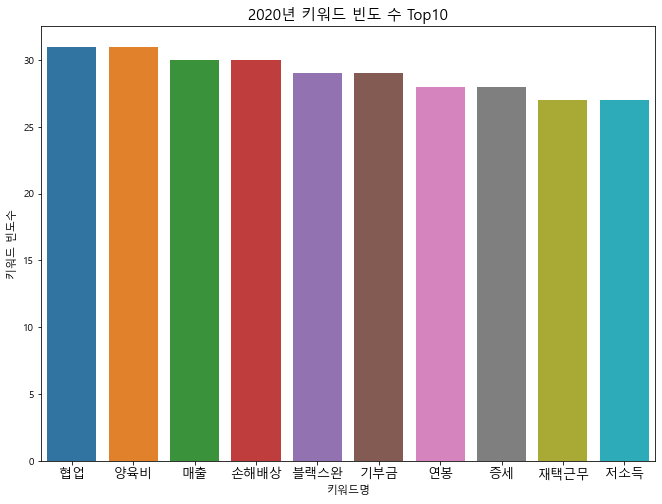

In [45]:
ax = plt.subplots(figsize=(11,8))
plt.xticks(fontsize=13)

ax = sns.barplot(keyword_2020_bindo_top10.index, keyword_2020_bindo_top10.values)
ax.set_xlabel("키워드명", fontsize=11)
ax.set_ylabel("키워드 빈도수", fontsize=11)

ax.set_title("2020년 키워드 빈도 수 Top10", fontsize=15)
plt.show()

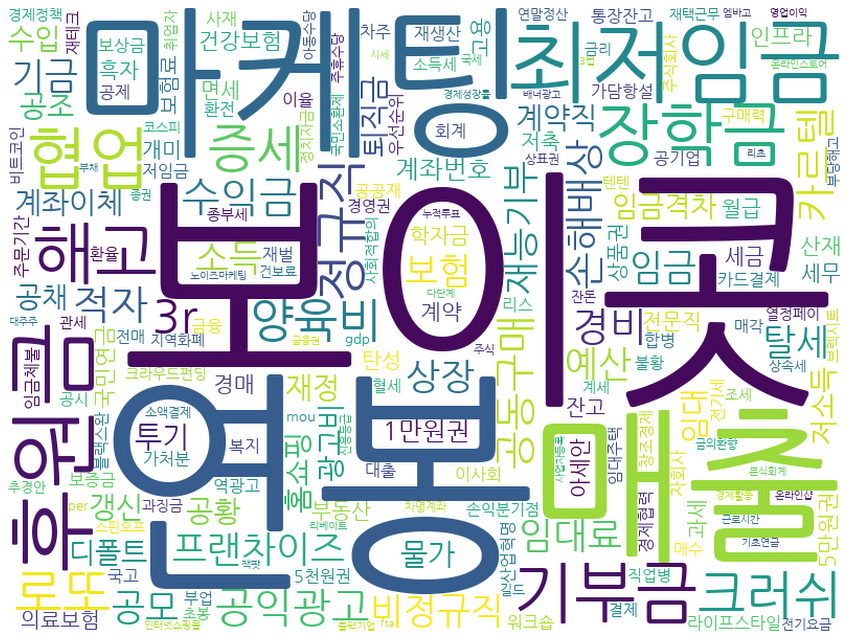

In [46]:
word_list = df['키워드명'].to_list()

word = ''

for w in word_list:
    word += w + ' '

    
plt.figure(figsize=(15,15)) #이미지 사이즈 지정
wc = WordCloud(font_path='./data/font/NanumGothic.ttf', background_color='white', width=800, height=600).generate(word)
plt.imshow(wc, interpolation='lanczos')
plt.axis('off')
plt.show()

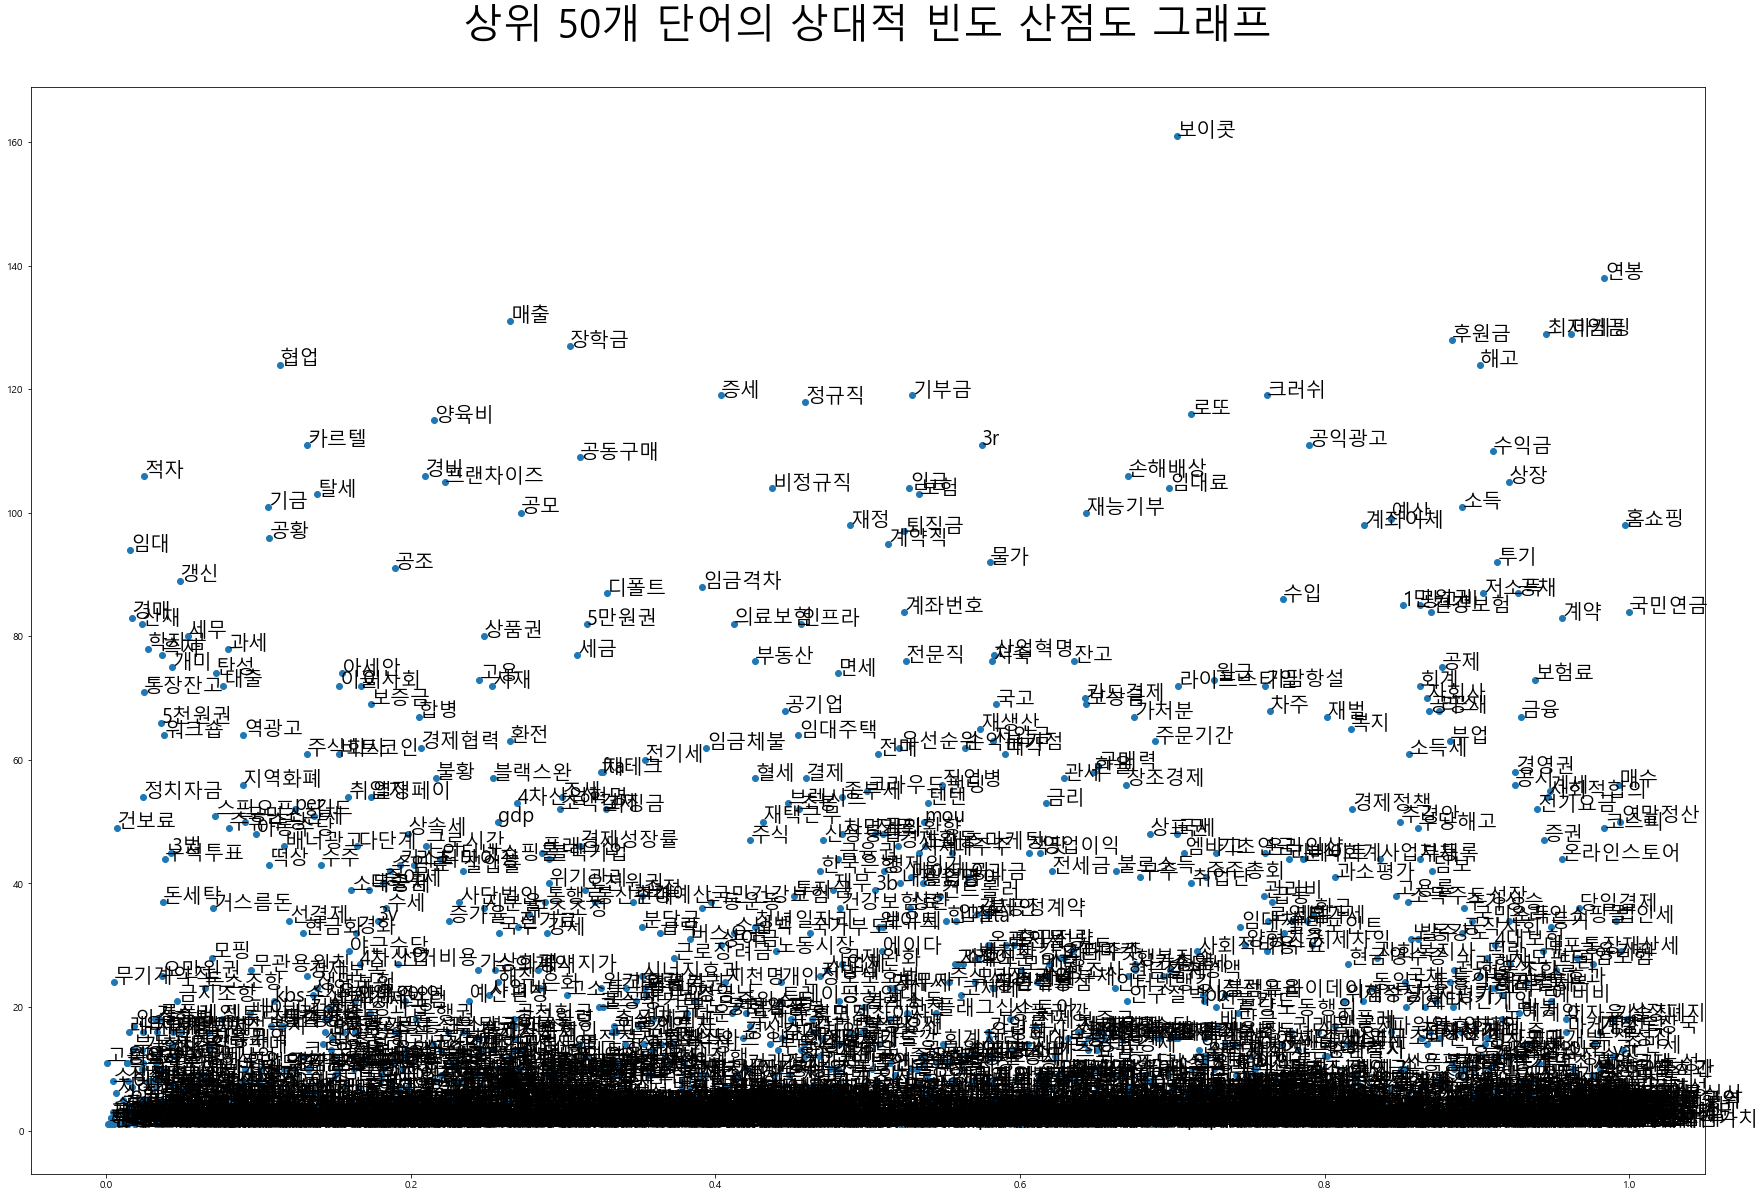

In [47]:
y = all_word_bindo.values
z = np.random.rand(1988)
n = all_word_bindo.index

fig, ax = plt.subplots(figsize=(30,20))
ax.set_title("상위 50개 단어의 상대적 빈도 산점도 그래프",pad=50,fontsize=40)
ax.scatter(z, y,)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]),fontsize=20)

C:\Users\pcn\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pcn\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

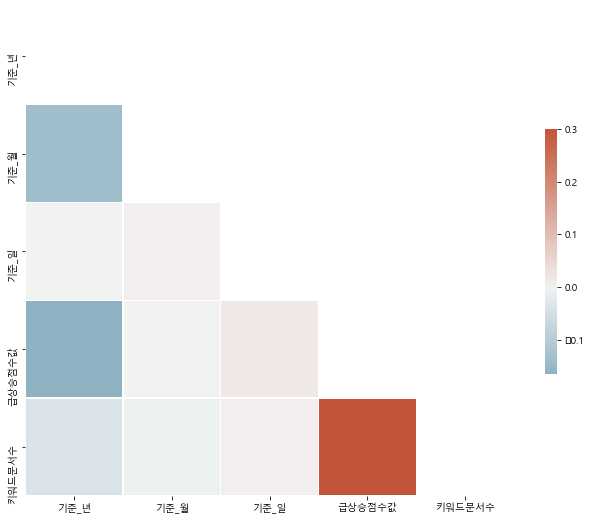

In [48]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

#ax.set_title("각 변수간의 상관 관계",pad=20,fontsize=15)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

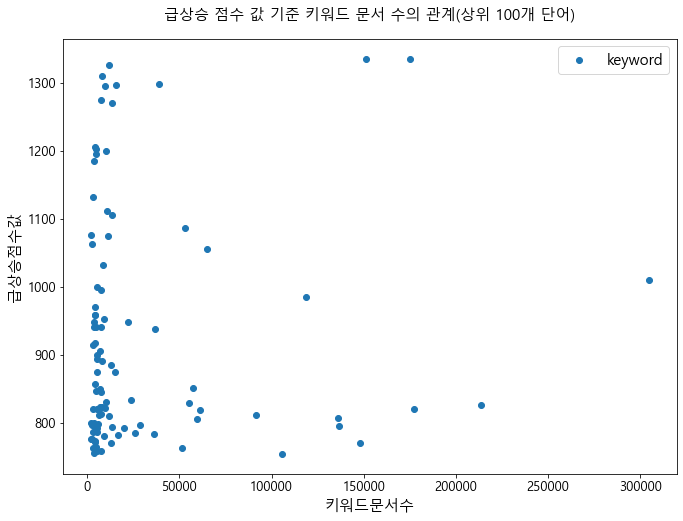

In [49]:
top_score = df.copy()

top_score = top_score.sort_values(by='급상승점수값', ascending=False).head(100)


fig, ax = plt.subplots(figsize=(11,8))

plt.scatter(top_score['키워드문서수'], top_score['급상승점수값'], label = "keyword")

ax.set_title("급상승 점수 값 기준 키워드 문서 수의 관계(상위 100개 단어)",pad=20,fontsize=15)

plt.legend(loc = "best", fontsize=15)
plt.xlabel('키워드문서수', fontsize=15)
plt.ylabel('급상승점수값', fontsize=15)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

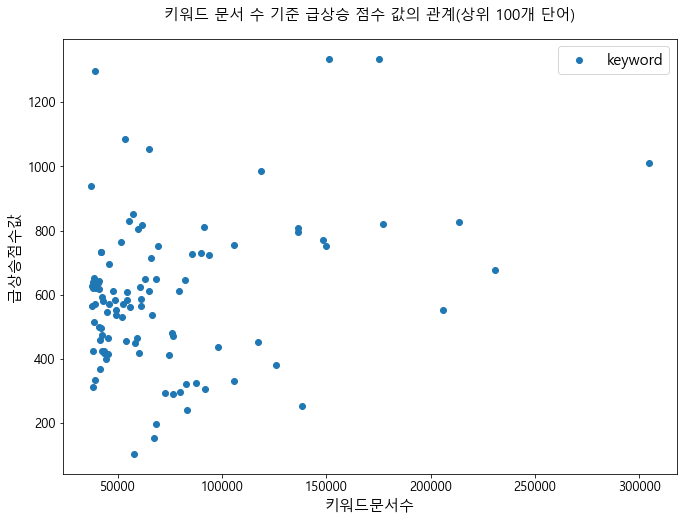

In [50]:
top_score = df.copy()

top_score = top_score.sort_values(by='키워드문서수', ascending=False).head(100)


fig, ax = plt.subplots(figsize=(11,8))

plt.scatter(top_score['키워드문서수'], top_score['급상승점수값'], label = "keyword")

ax.set_title("키워드 문서 수 기준 급상승 점수 값의 관계(상위 100개 단어)",pad=20,fontsize=15)

plt.legend(loc = "best", fontsize=15)
plt.xlabel('키워드문서수', fontsize=15)
plt.ylabel('급상승점수값', fontsize=15)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

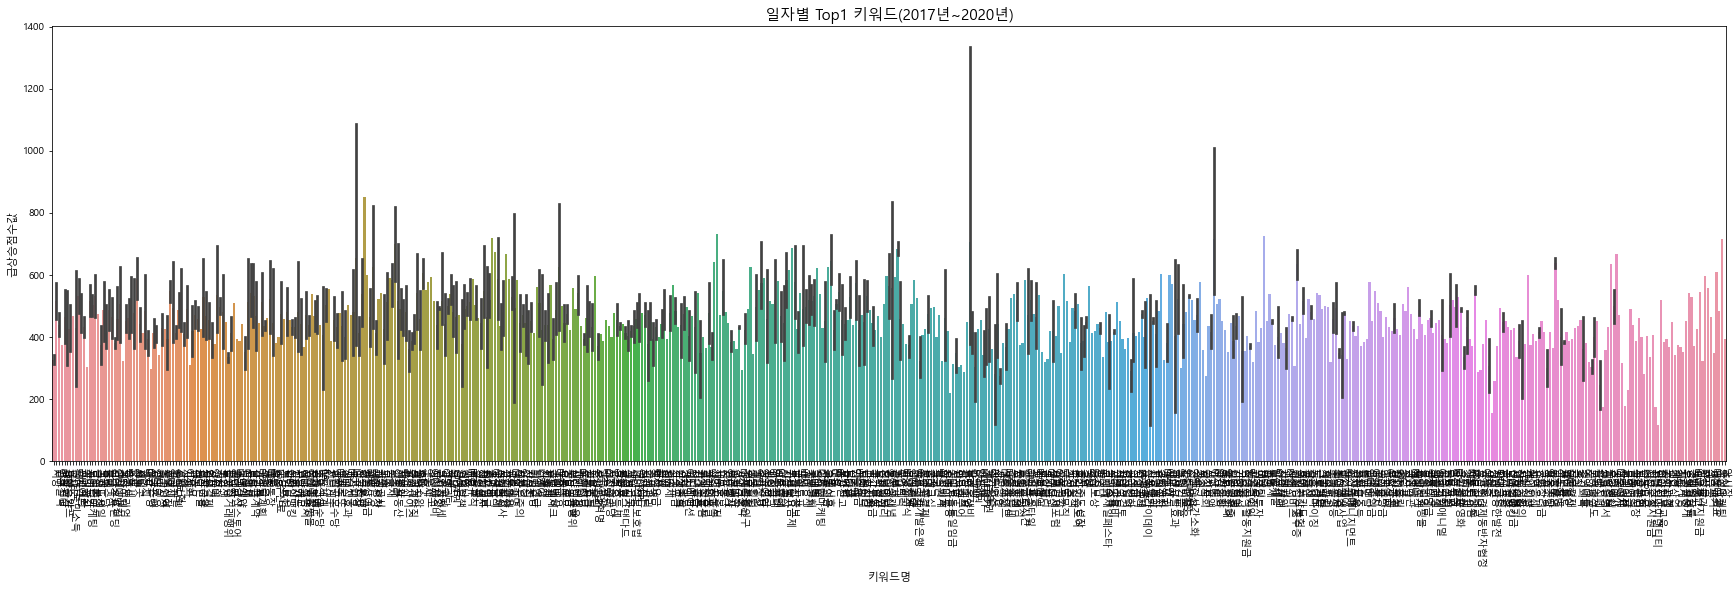

In [51]:
keyword_topscore = df[['기준일자', '키워드명', '급상승점수값']]

keyword_topscore = keyword_topscore.sort_values(by='급상승점수값', ascending=False).drop_duplicates(['기준일자'], keep='first')

keyword_topscore = keyword_topscore.sort_values(by='기준일자', ascending=True)

ax = plt.subplots(figsize=(30,8))
ax = sns.barplot(x='키워드명', y='급상승점수값', data=keyword_topscore)
plt.xticks(rotation = 270)
ax.set_xlabel("키워드명", fontsize=11)
ax.set_ylabel("급상승점수값", fontsize=11)
ax.set_title("일자별 Top1 키워드(2017년~2020년)", fontsize=15)
plt.show()

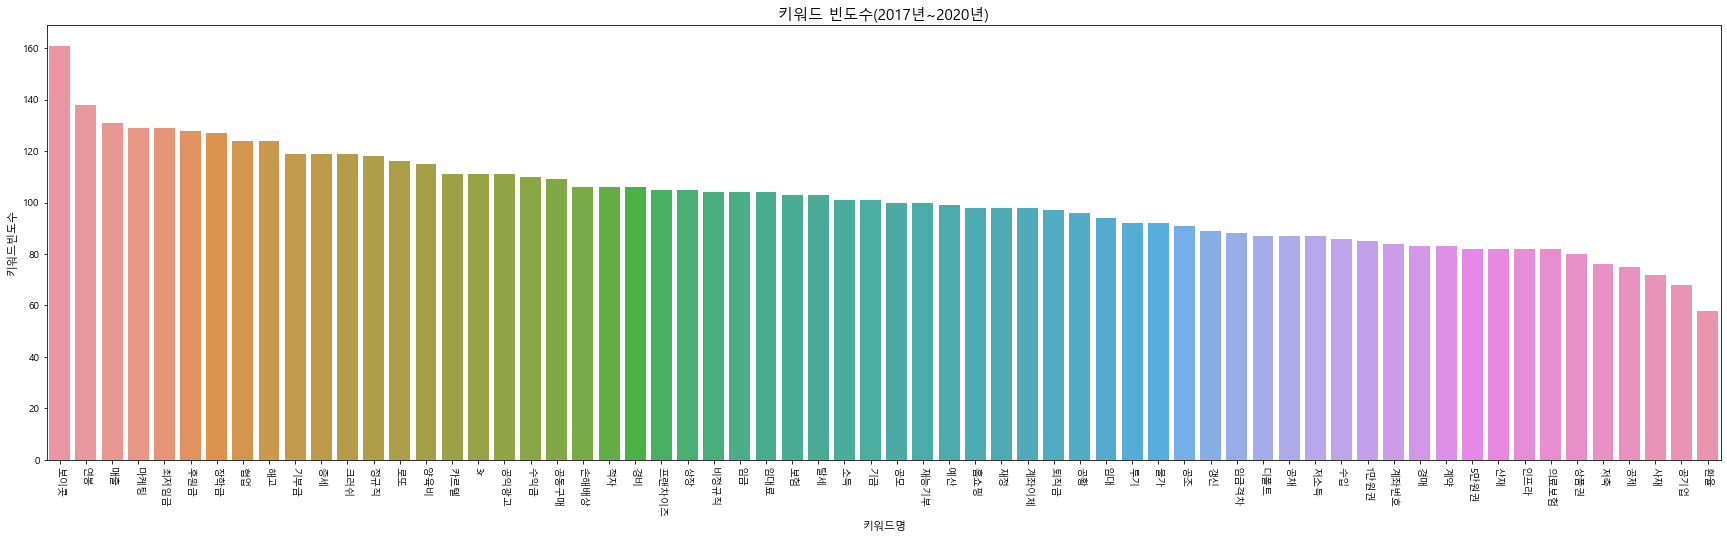

In [52]:
keyword_bindo = df.copy()
keyword_bindo['키워드빈도수'] = keyword_bindo.groupby(['키워드명'])['키워드명'].transform('count')

keyword_bindo = keyword_bindo[['기준일자', '키워드명', '키워드빈도수']]

keyword_bindo = keyword_bindo.sort_values(by='키워드빈도수', ascending=False).drop_duplicates(['기준일자'], keep='first')

keyword_topscore = keyword_topscore.sort_values(by='기준일자', ascending=True)

keyword_bindo = keyword_bindo.drop_duplicates(['키워드명']).head(300)

#keyword_bindo = keyword_bindo[keyword_bindo[''] >= 293690]

ax = plt.subplots(figsize=(30,8))
ax = sns.barplot(x='키워드명', y='키워드빈도수', data=keyword_bindo)
plt.xticks(rotation = 270)
ax.set_xlabel("키워드명", fontsize=11)
ax.set_ylabel("키워드빈도수", fontsize=11)
ax.set_title("키워드 빈도수(2017년~2020년)", fontsize=15)
plt.show()